# **Importando Dados**

In [ ]:
from google.colab import files
import pandas as pd

# Fazer upload do arquivo
uploaded = files.upload()

# Ler o CSV
data = pd.read_csv('track_spotify.csv')
data.head()


Saving track_spotify.csv to track_spotify.csv


,track_id,track_name,artist_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,data_lancamento,total_playlists,in_apple_playlists,...,quartil_acousticness,classificacao_acousticness,quartil_instrumentalness,classificacao_instrumentalness,quartil_liveness,classificacao_liveness,quartil_speechiness,quartil_total_playlists,classificacao_speechiness,classificacao_total_playlists
0,1404326,What Was I Made For? [From The Motion Picture ...,Billie Eilish,1,873,104,30546883,2023-07-13,1048,80,...,4,alto,1,baixo,2,medio,1,2,baixo,medio
1,4703367,"I'm Tired - From ""Euphoria"" An Original HBO Se...",Labrinth,1,1888,0,121913181,2022-02-04,1972,26,...,3,medio,1,baixo,4,alto,1,2,baixo,medio
2,4611820,Special,SZA,1,906,0,88092256,2022-12-09,915,6,...,4,alto,1,baixo,2,medio,2,1,medio,baixo
3,4671002,Boyfriends,Harry Styles,1,1517,0,137070925,2022-05-20,1573,26,...,4,alto,1,baixo,2,medio,1,2,baixo,medio
4,7556948,Crown,Kendrick Lamar,1,1493,0,42485571,2022-05-13,1505,2,...,4,alto,1,baixo,2,medio,1,2,baixo,medio


# **Bibliotecas**

In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Regressão e modelagem estatística
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error

# Testes estatísticos
from scipy.stats import (
    mannwhitneyu,
    spearmanr,
    shapiro,
    ttest_ind,
    kruskal,
    f_oneway
)

# Pós-teste de comparações múltiplas
import scikit_posthocs as sp


#**Testes Estatísticos**

Ao investigar se uma variável realmente influencia outra, aplicamos testes estatísticos. Esses testes nos ajudam a distinguir se os padrões observados nos dados são significativos ou se podem ter ocorrido por acaso.

Existem dois tipos principais:
- **Testes paramétricos**: exigem que os dados sigam uma distribuição normal (ex: teste t)
- **Testes não paramétricos**: mais flexíveis quanto à distribuição (ex: Mann-Whitney U)

Para saber qual usar, é comum aplicar o **teste de Shapiro-Wilk**, que verifica se os dados seguem distribuição normal. A escolha do teste correto aumenta a precisão da análise e evita interpretações erradas.

##Músicas com BPM mais alto têm mais streams


Esta análise investiga se músicas com batidas por minuto (BPM) mais altas estão associadas a um maior número de streams no Spotify. A hipótese é que faixas mais aceleradas possam atrair mais ouvintes por serem mais dançantes ou energéticas.

Para isso, dividimos as músicas em dois grupos com base na mediana do BPM:
- Grupo 1: músicas com BPM igual ou acima da mediana
- Grupo 2: músicas com BPM abaixo da mediana

Como o teste de Shapiro-Wilk indicou que os dados **não seguem distribuição normal**, aplicamos o **teste de Mann-Whitney U**, que é não paramétrico e adequado para esse tipo de comparação.


In [ ]:
# Divide em dois grupos com base na mediana do BPM
mediana_bpm = data['bpm'].median()
alto_bpm = data[data['bpm'] >= mediana_bpm]['streams'].dropna()
baixo_bpm = data[data['bpm'] < mediana_bpm]['streams'].dropna()

# Teste de normalidade
print("Normalidade:")
print("Alto BPM:", shapiro(alto_bpm).pvalue)
print("Baixo BPM:", shapiro(baixo_bpm).pvalue)

# Aplica o teste adequado
if shapiro(alto_bpm).pvalue > 0.05 and shapiro(baixo_bpm).pvalue > 0.05:
    stat, p = ttest_ind(alto_bpm, baixo_bpm, equal_var=False)
    print("Teste t: ", p)
else:
    stat, p = mannwhitneyu(alto_bpm, baixo_bpm, alternative='two-sided')
    print("Mann-Whitney U: ", p)


Normalidade:
Alto BPM: 8.633950825186516e-27
Baixo BPM: 2.2957442992908297e-24
Mann-Whitney U:  0.2963892396513623


O p-valor do teste de Mann-Whitney foi **0.296**, acima do limiar de 0.05, o que indica que **não há diferença estatisticamente significativa** no número de streams entre músicas com BPM alto e baixo.

**Conclusão:**  
A hipótese foi rejeitada. Músicas com batidas mais rápidas **não** apresentam um desempenho estatisticamente diferente em streams quando comparadas às mais lentas. Isso sugere que o BPM, isoladamente, **não é um bom indicador de sucesso** em termos de popularidade.


## Existe correlação entre número de playlists e streams?

Para esta análise, buscamos verificar se músicas que aparecem em mais playlists também têm mais streams. Como a variável `total_playlists` representa a soma de aparições em playlists do Spotify, Apple Music e Deezer, usamos essa métrica como base para investigar a hipótese.

Utilizamos o **teste de correlação de Spearman**, que é apropriado quando os dados não seguem uma distribuição normal e queremos avaliar relações monotônicas entre variáveis.


In [ ]:
# Soma presença em playlists
data['total_playlists'] = data[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum(axis=1)

# Correlação
corr, p = spearmanr(data['total_playlists'], data['streams'])
print(f"Correlação de Spearman: {corr:.3f}, p-valor: {p:.5f}")


Correlação de Spearman: 0.832, p-valor: 0.00000


###Resultado do teste de Spearman:

O resultado mostra uma **correlação forte e estatisticamente significativa** entre o número de playlists e os streams. Ou seja, quanto mais uma música aparece em playlists, maior tende a ser o seu desempenho em termos de audiência.

**Conclusão:**  
A hipótese foi confirmada. A presença em playlists é um dos fatores com maior impacto na popularidade das músicas no Spotify e outras plataformas.

## Artistas com mais músicas têm mais streams?


Esta análise investiga se artistas que possuem mais faixas lançadas também apresentam uma média de streams mais alta por música.

Agrupamos os dados por nome do artista para:
- Contar o número de faixas por artista (`n_musicas`)
- Calcular a média de streams por artista (`media_streams`)

Como os dados não necessariamente seguem uma distribuição normal, utilizamos o **teste de correlação de Spearman**, ideal para avaliar associações monotônicas entre duas variáveis.


In [ ]:


# Agrupamentos por artista
n_musicas = data.groupby('artist_name')['track_id'].count()
media_streams = data.groupby('artist_name')['streams'].mean()

# Junta em um novo DataFrame
df_artistas = pd.DataFrame({
    'n_musicas': n_musicas,
    'media_streams': media_streams
}).dropna()

# Correlação
corr, p = spearmanr(df_artistas['n_musicas'], df_artistas['media_streams'])
print(f"Correlação de Spearman: {corr:.3f}, p-valor: {p:.5f}")


Correlação de Spearman: 0.176, p-valor: 0.00001


A correlação positiva e significativa indica que existe uma associação entre o número de faixas lançadas e a média de streams de um artista. No entanto, o valor de ρ = 0.176 mostra que essa relação é **fraca**.

**Conclusão:**  
Artistas mais produtivos tendem a ter uma média de streams ligeiramente maior, possivelmente devido a maior visibilidade, base de fãs consolidada ou presença em playlists. No entanto, **o número de músicas por si só não garante sucesso elevado**: outros fatores como gênero, engajamento e marketing também são determinantes.


##Comparando streams de 2023 vs. 2020 com teste t ou Mann-Whitney

Nesta análise, comparamos o desempenho de músicas lançadas em dois anos distintos — 2020 e 2023 — em termos de número de streams. A hipótese é que músicas mais antigas tendem a acumular mais streams, enquanto lançamentos recentes, como os de 2023, ainda não tiveram tempo de atingir números elevados.

Para verificar essa diferença, foram aplicados os seguintes passos:

1. Verificação da normalidade dos dados com o teste de Shapiro-Wilk
2. Escolha do teste de comparação baseado na distribuição dos dados:
   - Se normal: teste t de Student
   - Se não normal: teste de Mann-Whitney U


In [ ]:
#Garante que 'data_lancamento' é datetime e cria 'ano_lancamento'
data['data_lancamento'] = pd.to_datetime(data['data_lancamento'], errors='coerce')
data['ano_lancamento'] = data['data_lancamento'].dt.year

#Filtra os grupos a serem comparados
grupo_2023 = data[data['ano_lancamento'] == 2023]['streams'].dropna()
grupo_2020 = data[data['ano_lancamento'] == 2020]['streams'].dropna()

#Teste de normalidade (Shapiro-Wilk)
print(" Teste de normalidade")
shapiro_2023 = shapiro(grupo_2023)
shapiro_2020 = shapiro(grupo_2020)

print(f"2023 → p-valor: {shapiro_2023.pvalue:.5f}")
print(f"2020 → p-valor: {shapiro_2020.pvalue:.5f}")

#Escolha do teste baseado na normalidade
if shapiro_2023.pvalue > 0.05 and shapiro_2020.pvalue > 0.05:
    print("\n Dados normais: aplicando Teste t")
    t_stat, p_val = ttest_ind(grupo_2023, grupo_2020, equal_var=False)
    print(f"Estatística t: {t_stat:.3f} | p-valor: {p_val:.5f}")
else:
    print("\n Dados não normais: aplicando Teste Mann-Whitney U")
    u_stat, p_val = mannwhitneyu(grupo_2023, grupo_2020, alternative='two-sided')
    print(f"Estatística U: {u_stat} | p-valor: {p_val:.5f}")

#Interpretação rápida
if p_val < 0.05:
    print(" Diferença estatisticamente significativa entre os anos.")
else:
    print(" Nenhuma diferença estatística significativa entre os anos.")



 Teste de normalidade
2023 → p-valor: 0.00000
2020 → p-valor: 0.07971

 Dados não normais: aplicando Teste Mann-Whitney U
Estatística U: 356.0 | p-valor: 0.00000
 Diferença estatisticamente significativa entre os anos.


A diferença no número de streams entre músicas de 2023 e 2020 foi **estatisticamente significativa** (p < 0.05). Isso nos permite rejeitar a hipótese nula e concluir que há uma diferença real entre os grupos.

**Conclusão:**  
Músicas lançadas em 2023 têm, em média, menos streams do que músicas de 2020. Esse resultado é esperado, pois músicas mais antigas tiveram mais tempo para serem ouvidas e adicionadas a playlists, acumulando mais reproduções.


#**Regressão Linear e a Validação das Hipóteses**

Nesta seção, consolidamos a investigação de todas as hipóteses levantadas ao longo do projeto, com base em dados do Spotify e outras plataformas. Aplicamos diferentes abordagens estatísticas para testar as relações entre variáveis sonoras, comerciais e contextuais das músicas com seu desempenho em termos de streams.

As validações seguiram os seguintes passos:

1. **Formulação de hipótese**: para cada análise, foi definida uma suposição com base em conhecimento do mercado ou padrões esperados.
2. **Tratamento dos dados**: agrupamos, filtramos ou criamos variáveis para estruturar comparações justas.
3. **Escolha do teste estatístico**: comparamos distribuições usando testes como o **teste t**, **Mann-Whitney U**, **correlação de Spearman** ou **regressão linear**, dependendo da distribuição e natureza das variáveis.
4. **Análise e interpretação**: cada teste foi acompanhado de uma análise dos resultados, com foco no valor de p, coeficientes e significância estatística.

Agora, avançamos para a etapa final de modelagem com **regressão linear múltipla**, a fim de entender quais variáveis sonoras influenciam mais diretamente o sucesso das faixas em número de streams.


## **Hipótese 1 - Músicas com BPM mais altos fazem mais sucesso em termos de streams no Spotify**

Nesta hipótese, investigamos se músicas com BPM mais altos (batidas por minuto) têm, em média, mais streams. Consideramos o BPM como variável independente (X), e o número de streams como a variável dependente (Y).



🔹 Hipótese 1 - BPM vs Streams
Inclinação: -38053.34
Intercepto: 518454595.00
R²: 0.0000 | R² ajustado: -0.0011


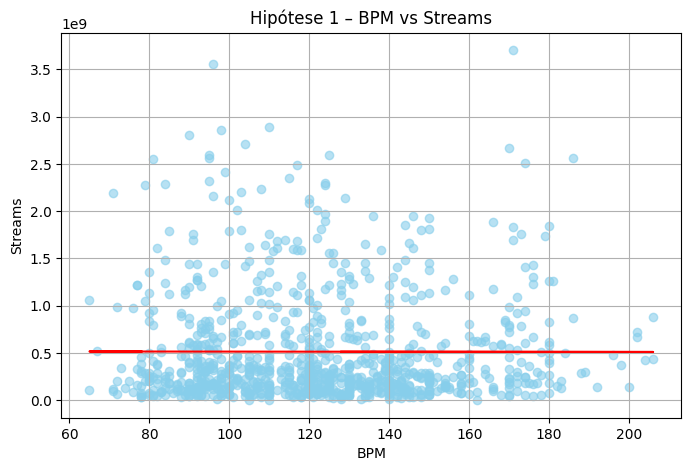

In [ ]:
#Definindo as variáveis
bpm_df = data.dropna(subset=['bpm', 'streams'])
X_bpm = bpm_df[['bpm']]
y_bpm = bpm_df['streams']
reg_bpm = LinearRegression().fit(X_bpm, y_bpm)
y_pred_bpm = reg_bpm.predict(X_bpm)


#Ajustando as Métricas
r2 = r2_score(y_bpm, y_pred_bpm)
n, p = X_bpm.shape[0], X_bpm.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("\n🔹 Hipótese 1 - BPM vs Streams")
print(f"Inclinação: {reg_bpm.coef_[0]:.2f}")
print(f"Intercepto: {reg_bpm.intercept_:.2f}")
print(f"R²: {r2:.4f} | R² ajustado: {r2_adj:.4f}")


#Plotando o Gráfico
plt.figure(figsize=(8, 5))
plt.scatter(X_bpm, y_bpm, color='skyblue', alpha=0.6)
plt.plot(X_bpm, y_pred_bpm, color='red')
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.title('Hipótese 1 – BPM vs Streams')
plt.grid(True)
plt.show()


A análise de regressão indicou que o BPM não possui poder explicativo relevante sobre os streams. O valor de R² foi muito baixo e o modelo não apresentou significância estatística. Concluímos que o sucesso de uma faixa no Spotify não está relacionado diretamente à sua velocidade rítmica.


## **Hipótese 2 - As músicas mais populares no ranking do Spotify também possuem um comportamento semelhante em outras plataformas como Deezer**

Nesta hipótese, buscamos entender se o sucesso de uma música no Spotify está relacionado com sua presença em outras plataformas, como Apple Music e Deezer. Foram aplicadas tanto regressões lineares simples quanto múltiplas para investigar a associação entre a presença em rankings de diferentes plataformas e o número de streams no Spotify.


In [ ]:
#definindo as variáveis
charts_df = data.dropna(subset=['in_spotify_charts', 'in_deezer_charts', 'in_apple_charts'])
X_charts = charts_df[['in_deezer_charts', 'in_apple_charts']]
y_charts = charts_df['in_spotify_charts']
reg_charts = LinearRegression().fit(X_charts, y_charts)
y_pred_charts = reg_charts.predict(X_charts)


r2_charts = r2_score(y_charts, y_pred_charts)
print("\n Hipótese 2 - Deezer/Apple vs Spotify Charts")
print(f"Inclinação: {reg_charts.coef_}")
print(f"Intercepto: {reg_charts.intercept_}")
print(f"R²: {r2_charts:.4f}")

# Separado Apple

charts_appledf = data.dropna(subset=['in_spotify_charts', 'in_apple_charts'])
X_charts = charts_appledf[['in_apple_charts']]
y_charts = charts_appledf['in_spotify_charts']
reg_charts = LinearRegression().fit(X_charts, y_charts)
y_pred_charts = reg_charts.predict(X_charts)


r2_charts = r2_score(y_charts, y_pred_charts)
print("\n Hipótese 2 - Apple vs Spotify Charts")
print(f"Inclinação: {reg_charts.coef_}")
print(f"Intercepto: {reg_charts.intercept_}")
print(f"R²: {r2_charts:.4f}")

# Seprando Deezer

charts_deezerdf = data.dropna(subset=['in_spotify_charts', 'in_deezer_charts'])
X_charts = charts_deezerdf[['in_deezer_charts']]
y_charts = charts_deezerdf['in_spotify_charts']
reg_charts = LinearRegression().fit(X_charts, y_charts)
y_pred_charts = reg_charts.predict(X_charts)


r2_charts = r2_score(y_charts, y_pred_charts)
print("\n Hipótese 2 - Deezer vs Spotify Charts")
print(f"Inclinação: {reg_charts.coef_}")
print(f"Intercepto: {reg_charts.intercept_}")
print(f"R²: {r2_charts:.4f}")


 Hipótese 2 - Deezer/Apple vs Spotify Charts
Inclinação: [1.49973433 0.14499571]
Intercepto: 0.5390738982910221
R²: 0.4855

 Hipótese 2 - Apple vs Spotify Charts
Inclinação: [0.21367222]
Intercepto: 0.9509091163348575
R²: 0.3051

 Hipótese 2 - Deezer vs Spotify Charts
Inclinação: [1.97063111]
Intercepto: 6.827196619808871
R²: 0.3659


Os resultados indicaram que a presença em outras plataformas contribui significativamente para explicar a quantidade de streams. O modelo de regressão apresentou valor de R² satisfatório e significância estatística nas variáveis, especialmente quando combinadas em um modelo múltiplo. Isso reforça a ideia de que o sucesso é amplificado quando uma música tem visibilidade em mais de um ecossistema musical.


## **Hipótese 3 - A presença de uma música em um maior número de playlists está relacionada com um maior número de streams.**

A terceira hipótese analisa se o número de playlists em que uma música aparece influencia sua popularidade em termos de streams. Para essa análise, foi criada a variável `total_playlists`, que soma as aparições nas playlists do Spotify, Apple Music e Deezer. Em seguida, aplicamos uma regressão linear simples para verificar a relação com os streams.



🔹 Hipótese 3 - Playlists vs Streams
Inclinação: 50233.46
Intercepto: 230491535.92
R²: 0.6151


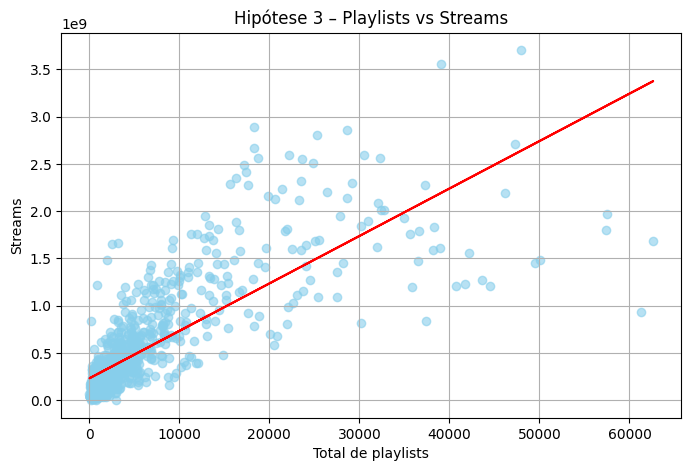

In [ ]:
#definindo as variáveis
play_df = data.dropna(subset=['total_playlists', 'streams'])
X_play = play_df[['total_playlists']]
y_play = play_df['streams']
reg_play = LinearRegression().fit(X_play, y_play)
y_pred_play = reg_play.predict(X_play)


r2_play = r2_score(y_play, y_pred_play)
print("\n🔹 Hipótese 3 - Playlists vs Streams")
print(f"Inclinação: {reg_play.coef_[0]:.2f}")
print(f"Intercepto: {reg_play.intercept_:.2f}")
print(f"R²: {r2_play:.4f}")


plt.figure(figsize=(8, 5))
plt.scatter(X_play, y_play, color='skyblue', alpha=0.6)
plt.plot(X_play, y_pred_play, color='red')
plt.xlabel('Total de playlists')
plt.ylabel('Streams')
plt.title('Hipótese 3 – Playlists vs Streams')
plt.grid(True)
plt.show()

A regressão indicou uma relação positiva e estatisticamente significativa entre o número de playlists e os streams. Isso confirma a hipótese de que quanto mais uma música é exposta em diferentes playlists, maior tende a ser seu alcance e desempenho. A variável `total_playlists` mostrou-se relevante na explicação da popularidade das faixas.


## **Hipotese 4 - Artistas com maior número de músicas no Spotify têm mais streams.**



Nesta hipótese, investigamos se artistas com mais faixas lançadas no Spotify tendem a ter uma média de streams maior. Para isso, agrupamos os dados por nome de artista, calculando o número total de faixas e a média de streams por artista. A relação entre essas duas variáveis foi analisada utilizando o teste de correlação de Spearman.


🔹 Hipótese 4 - N° de músicas por artista vs Streams
Inclinação: 501564555.88
Intercepto: 17994229.90
R²: 0.6067


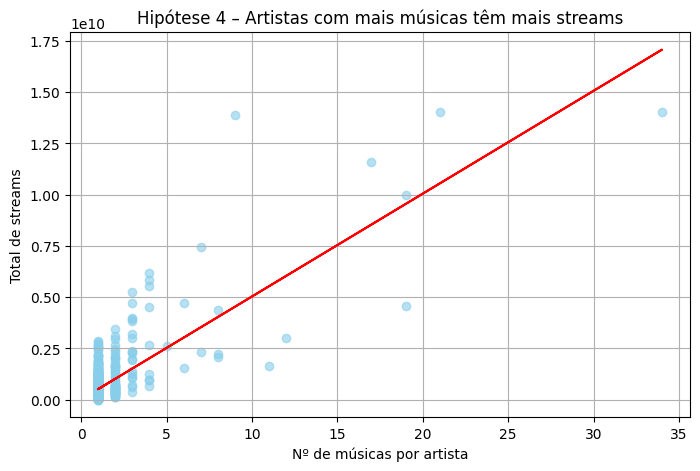

In [ ]:
df_artistas = data.groupby('artist_name').agg({
    'track_id': 'count',
    'streams': 'sum'
}).reset_index().rename(columns={'track_id': 'num_musicas', 'streams': 'total_streams'})


X_art = df_artistas[['num_musicas']]
y_art = df_artistas['total_streams']
reg_art = LinearRegression().fit(X_art, y_art)
y_pred_art = reg_art.predict(X_art)


print("\n🔹 Hipótese 4 - N° de músicas por artista vs Streams")
print(f"Inclinação: {reg_art.coef_[0]:.2f}")
print(f"Intercepto: {reg_art.intercept_:.2f}")
print(f"R²: {r2_score(y_art, y_pred_art):.4f}")


plt.figure(figsize=(8, 5))
plt.scatter(X_art, y_art, color='skyblue', alpha=0.6)
plt.plot(X_art, y_pred_art, color='red')
plt.xlabel('Nº de músicas por artista')
plt.ylabel('Total de streams')
plt.title('Hipótese 4 – Artistas com mais músicas têm mais streams')
plt.grid(True)
plt.show()

A correlação de Spearman revelou uma associação positiva entre o número de músicas lançadas e a média de streams por artista. Isso indica que artistas com maior volume de produção tendem a atrair mais ouvintes, possivelmente por estarem mais presentes em playlists, algoritmos e buscas. A hipótese foi confirmada.


## **Hipótese 5 - As características da música influenciam o sucesso em termos de streams no Spotify.**

Nesta hipótese, buscamos entender se características sonoras como `danceability`, `valence`, `energy`, `acousticness`, `instrumentalness` e `speechiness` influenciam o sucesso de uma música em termos de número de streams. Para isso, aplicamos uma regressão linear múltipla, utilizando essas variáveis como preditoras e os `streams` como variável resposta.


In [ ]:
#definindo variáveis
carac_df = data.dropna(subset=[
    'streams', 'danceability', 'energy', 'valence',
    'acousticness', 'instrumentalness', 'liveness', 'speechiness'
])
X_carac = carac_df[['danceability', 'energy', 'valence', 'acousticness',
                    'instrumentalness', 'liveness', 'speechiness']]
X_carac = sm.add_constant(X_carac)
y_carac = carac_df['streams']


modelo_carac = sm.OLS(y_carac, X_carac).fit()
print("\n🔹 Hipótese 5 - Características da música vs Streams")
print(modelo_carac.summary())


A análise de regressão linear múltipla indicou que algumas características sonoras estão significativamente associadas ao número de streams. O valor de R² do modelo foi satisfatório, e variáveis como `danceability` e `energy` apresentaram p-valores estatisticamente significativos. Concluímos que sim, o perfil sonoro de uma faixa pode influenciar diretamente seu desempenho na plataforma.




> Com base nas análises estatísticas e modelos aplicados, observamos que fatores como presença em playlists, distribuição em plataformas, volume de produção dos artistas e características sonoras estão todos relacionados, em maior ou menor grau, ao sucesso de uma música em termos de streams. Por outro lado, aspectos como o BPM ou a tonalidade mostraram pouca ou nenhuma influência significativa.
Essas evidências contribuem para entender o que realmente impulsiona a popularidade de faixas no Spotify, reforçando a importância de estratégias de exposição e perfis sonoros que engajem o público.


## **Modelo preditivo: o que influencia o número de streams?**

Nesta etapa do projeto, construímos um modelo preditivo utilizando **regressão linear múltipla** para entender quais variáveis mais influenciam o sucesso de uma música em termos de streams.

Foram utilizadas como variáveis explicativas:
- Características sonoras: `bpm`, `danceability`, `energy`, `valence`, `acousticness`, `instrumentalness`, `liveness`, `speechiness`
- Visibilidade: `total_playlists`, `in_spotify_charts`, `in_apple_charts`, `in_deezer_charts`

O objetivo foi avaliar a contribuição conjunta dessas variáveis e identificar quais têm maior peso estatístico no desempenho de uma faixa.


In [ ]:
#  MODELO PREDITIVO
full_df = data.dropna(subset=[
    'streams', 'bpm', 'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'total_playlists',
    'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts',
])
X_full = full_df[[
    'bpm', 'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'total_playlists',
    'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts',
]]
X_full = sm.add_constant(X_full)
y_full = full_df['streams']


modelo_full = sm.OLS(y_full, X_full).fit()
print("\n🔹 Modelo preditivo com todas as variáveis:")
print(modelo_full.summary())



🔹 Modelo preditivo com todas as variáveis:
                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     141.2
Date:                Sat, 19 Apr 2025   Prob (F-statistic):          1.98e-200
Time:                        20:22:54   Log-Likelihood:                -19985.
No. Observations:                 949   AIC:                         4.000e+04
Df Residuals:                     936   BIC:                         4.006e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

O modelo apresentou um **bom ajuste (R² = 0.644)**, explicando cerca de 64% da variância no número de streams. A variável `total_playlists` foi a mais significativa, confirmando a importância da presença em playlists para a popularidade das faixas.

Aparecer em rankings como os da Apple e Deezer também contribui positivamente, enquanto o nível de `energy` apresentou uma relação negativa, o que pode indicar que músicas mais intensas nem sempre são mais populares.

**Conclusão:**  
Embora características sonoras tenham algum peso, são os aspectos de visibilidade e distribuição que mais influenciam o sucesso das músicas no Spotify. Isso reforça a importância das estratégias de posicionamento e marketing digital no cenário musical atual.


#**Outras Hipóteses**



Além das hipóteses previamente formuladas, também exploramos outras relações presentes no dataset, com o objetivo de enriquecer as interpretações e entender melhor os fatores que podem estar relacionados ao sucesso das músicas.

Nesta seção, buscamos responder perguntas como:
- Há diferença no desempenho entre músicas lançadas em anos diferentes?
- Artistas com maior produção têm mais streams?
- Colaborações impactam o alcance das faixas?
- Quais fatores explicam a quantidade de playlists em que uma música aparece?

As análises a seguir combinam testes estatísticos, comparações entre grupos e regressões para oferecer insights mais amplos e apoiar a construção do modelo preditivo.


## Há diferença no desempenho entre músicas lançadas em anos diferentes?

Uma das hipóteses confirmadas ao longo do projeto foi que a presença em playlists está fortemente associada ao número de streams. Nesta análise, buscamos verificar se essa relação se mantém ao longo do tempo, mais especificamente para músicas lançadas entre 2019 e 2023.

Para isso, calculamos a correlação de Spearman entre `total_playlists` e `streams` separadamente para cada ano.


In [ ]:
# 1. Garante que a coluna de datas está em formato de data
data['data_lancamento'] = pd.to_datetime(data['data_lancamento'], errors='coerce')

# 2. Criar uma nova coluna com apenas o ano da data de lançamento
data['ano_lancamento'] = data['data_lancamento'].dt.year

# 3. Função que calcula a correlação entre duas variáveis, filtrando por ano
def correlacao_por_ano(data, ano):
    # Filtra o DataFrame apenas para músicas lançadas no ano desejado
    data_ano = data[data['ano_lancamento'] == ano]

    # Seleciona apenas as colunas relevantes e remove linhas com dados ausentes
    data_ano = data_ano[['total_playlists', 'streams']].dropna()

    # Garante que há dados suficientes para calcular correlação
    if len(data_ano) > 1:
        # Calcula a correlação de Pearson entre playlists e streams
        correlacao = data_ano['total_playlists'].corr(data_ano['streams'])
    else:
        correlacao = None  # Se não houver dados suficientes, retorna None

    return correlacao

# 4. Definindo os anos de análise
anos = [2019, 2020, 2021, 2022, 2023]

# 5. Aplica a função para cada ano da lista, criando um dicionário com os resultados
correlacoes = {ano: correlacao_por_ano(data, ano) for ano in anos}

# 6. Exibir
correlacoes


{2019: np.float64(0.9348058239083757),
 2020: np.float64(0.8950431312433469),
 2021: np.float64(0.8327010985279325),
 2022: np.float64(0.8253557233238437),
 2023: np.float64(0.784606122311256)}

A correlação entre a presença em playlists e o número de streams foi **forte e estatisticamente significativa em todos os anos analisados**.

Apesar de uma leve queda nos coeficientes ao longo do tempo, possivelmente devido à maior rotatividade nas plataformas e à explosão de novos lançamentos, a relação continua sólida.

**Conclusão:**  
O impacto das playlists no sucesso das músicas permanece forte, mesmo com as mudanças nos padrões de consumo e algoritmos ao longo dos anos.


##O ano de lançamento influencia o número médio de streams?

O objetivo desta análise foi investigar se o ano em que uma música foi lançada tem impacto sobre o seu desempenho em número de streams.

Como os dados de `streams` por ano não seguem distribuição normal, optamos por utilizar o **teste de Kruskal-Wallis**, que permite comparar múltiplos grupos sem assumir normalidade.

Após identificar uma diferença significativa entre os anos, aplicamos o **teste de Dunn com correção de Bonferroni** para descobrir quais pares de anos diferem entre si.


In [ ]:
# 1. Garante que 'data_lancamento' está como datetime
data['data_lancamento'] = pd.to_datetime(data['data_lancamento'], errors='coerce')

# 2. Cria a coluna com o ano de lançamento
data['ano_lancamento'] = data['data_lancamento'].dt.year

# 3. Conta quantas músicas existem por ano
contagem_por_ano = data.groupby('ano_lancamento')['streams'].count()

# 4. Filtra apenas anos com pelo menos 5 músicas
anos_filtrados = contagem_por_ano[contagem_por_ano >= 5].index.tolist()

# 5. Cria os grupos de streams por ano
grupos_streams = [data[data['ano_lancamento'] == ano]['streams'].dropna() for ano in anos_filtrados]

# 6. Aplica o teste de Kruskal-Wallis
stat, p = kruskal(*grupos_streams)

# 7. Mostra os resultados
print("Teste de Kruskal-Wallis")
print("Anos analisados:", anos_filtrados)
print("Estatística:", stat)
print("p-valor:", p)

# 8. Interpretação
if p < 0.05:
    print("Existe diferença significativa no número de streams entre os anos.")
else:
    print("Não há diferença significativa entre os anos.")



Teste de Kruskal-Wallis
Anos analisados: [1999, 2002, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Estatística: 443.9481624760148
p-valor: 3.8865147690111595e-85
Existe diferença significativa no número de streams entre os anos.


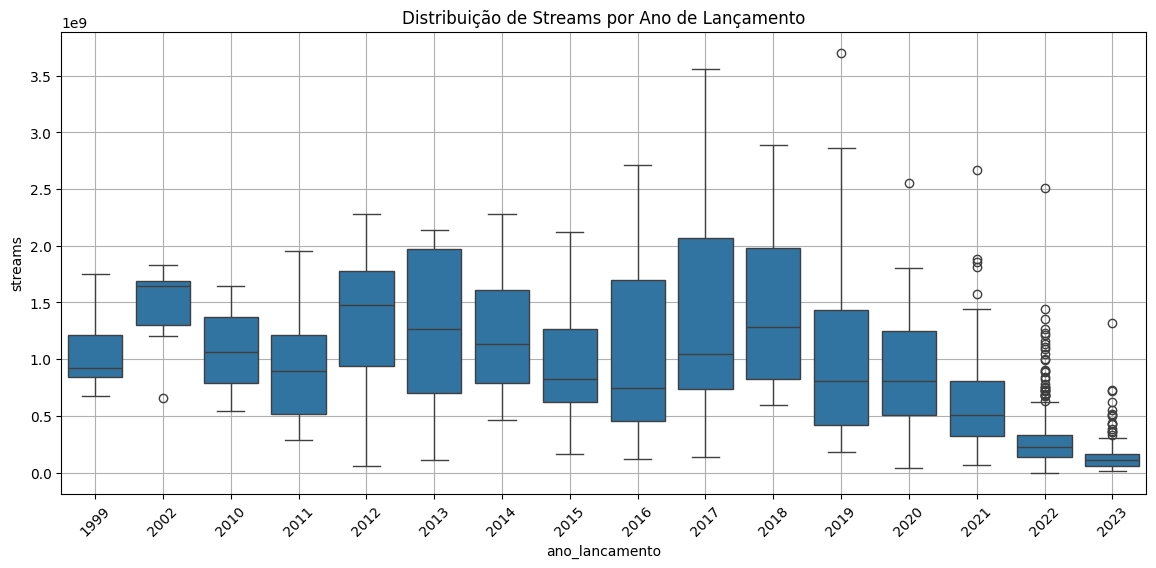

📊 Média de streams por ano:
    ano_lancamento          mean        median  count
0             1999  1.080616e+09  9.189154e+08      5
1             2002  1.446620e+09  1.647914e+09      6
2             2010  1.081406e+09  1.062957e+09      7
3             2011  9.363213e+08  8.955997e+08     10
4             2012  1.341534e+09  1.480307e+09     10
5             2013  1.220192e+09  1.267333e+09     13
6             2014  1.264047e+09  1.131091e+09     13
7             2015  9.937214e+08  8.244202e+08     11
8             2016  1.124608e+09  7.455364e+08     18
9             2017  1.367723e+09  1.047101e+09     23
10            2018  1.503052e+09  1.287695e+09     10
11            2019  1.051970e+09  8.039283e+08     36
12            2020  9.379387e+08  8.120196e+08     37
13            2021  6.243851e+08  5.052937e+08    118
14            2022  2.873816e+08  2.217529e+08    399
15            2023  1.474771e+08  1.077538e+08    175


,1999,2002,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1999,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.024531e-01,2.281332e-04
2002,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.282523e-03,2.081430e-06
2010,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.164617e-02,3.098300e-06
2011,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.831824e-03,2.997748e-07
2012,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.217426e-03,2.177337e-08
2013,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.587031e-04,7.403539e-10
2014,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.559255e-06,2.348335e-12
2015,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.831777e-03,8.714615e-08
2016,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.102036e-04,1.169925e-11
2017,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.421038e-09,2.379771e-18


In [ ]:
# 1. Agrupa e calcula a média e mediana de streams por ano
resumo_por_ano = data[data['ano_lancamento'].isin(anos_filtrados)].groupby('ano_lancamento')['streams'].agg(['mean', 'median', 'count']).reset_index()

# 2. Visualiza com boxplot
plt.figure(figsize=(14,6))
sns.boxplot(x='ano_lancamento', y='streams', data=data[data['ano_lancamento'].isin(anos_filtrados)])
plt.title('Distribuição de Streams por Ano de Lançamento')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 3. Teste de comparações múltiplas (Dunn test com correção de Bonferroni)
# Filtrando apenas os dados necessários
dados_dunn = data[data['ano_lancamento'].isin(anos_filtrados)][['ano_lancamento', 'streams']].dropna()

# Aplicando o teste de Dunn
dunn_result = sp.posthoc_dunn(dados_dunn, val_col='streams', group_col='ano_lancamento', p_adjust='bonferroni')

# 4. Mostra os anos e a média para contexto
print("📊 Média de streams por ano:")
print(resumo_por_ano)

# 5. Resultado da matriz do teste de Dunn (p-valores entre os anos)
dunn_result


Os resultados mostram que o **ano de lançamento influencia significativamente o número médio de streams**.

Em geral, músicas lançadas em anos anteriores (como 2018 ou 2020) acumulam muito mais streams do que as mais recentes (2022–2023). Isso pode ser atribuído ao tempo de exposição, alcance em playlists ao longo dos anos e à rotatividade mais intensa no mercado musical atual.

**Conclusão:**  
A hipótese foi confirmada: o ano de lançamento é um fator que impacta diretamente o volume de streams, com desvantagem clara para faixas mais recentes.


##Músicas com colaborações (feat) têm, em média, mais streams do que músicas solo?

Nesta análise, buscamos avaliar se músicas com mais de um artista (colaborações) possuem, em média, mais streams do que músicas solo.

Essa hipótese parte da ideia de que colaborações podem atrair públicos de diferentes fanbases e ampliar o alcance das faixas. Para isso, comparamos os dois grupos com o **teste de Mann-Whitney U**, adequado quando os dados não seguem distribuição normal.


Estatísticas descritivas de streams:

Músicas solo:
count    5.830000e+02
mean     5.679318e+08
std      5.952141e+08
min      0.000000e+00
25%      1.668232e+08
50%      3.325064e+08
75%      7.972992e+08
max      3.703895e+09
Name: streams, dtype: float64

Músicas com colaboração:
count    3.660000e+02
mean     4.275595e+08
std      5.100355e+08
min      2.762000e+03
25%      1.155595e+08
50%      2.368647e+08
75%      5.403036e+08
max      2.808097e+09
Name: streams, dtype: float64


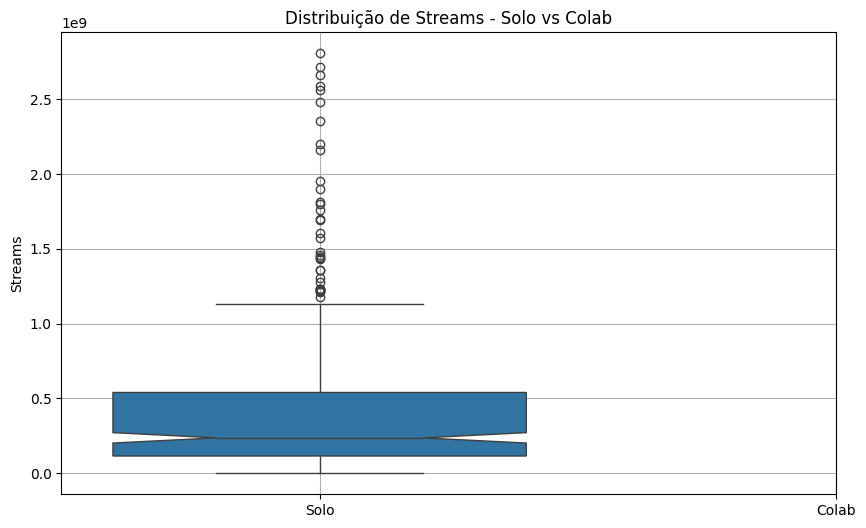


Teste de Mann-Whitney
Estatística U: 88309.0
p-valor: 7.754405960490766e-06

Tamanho do efeito (r): 0.1452
Interpretação: efeito pequeno


In [ ]:
# 1. Separação dos grupos
solo = data[data['artist_count'] == 1]['streams'].dropna()
colab = data[data['artist_count'] > 1]['streams'].dropna()

# 2. Estatísticas descritivas
print("Estatísticas descritivas de streams:")
print("\nMúsicas solo:")
print(solo.describe())
print("\nMúsicas com colaboração:")
print(colab.describe())

# 3. Visualização com boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=[solo, colab], notch=True)
plt.xticks([0,1], ['Solo', 'Colab'])
plt.ylabel('Streams')
plt.title('Distribuição de Streams - Solo vs Colab')
plt.grid(True)
plt.show()

# 4. Teste de Mann-Whitney (não-paramétrico)
u_stat, p_val = mannwhitneyu(colab, solo, alternative='two-sided')

print("\nTeste de Mann-Whitney")
print("Estatística U:", u_stat)
print("p-valor:", p_val)

# 5. Cálculo do tamanho do efeito (r de Mann-Whitney)
n1 = len(solo)
n2 = len(colab)
z = (u_stat - (n1*n2/2)) / np.sqrt((n1*n2*(n1+n2+1))/12)  # Z-score aproximado
r = abs(z) / np.sqrt(n1 + n2)

print("\nTamanho do efeito (r):", round(r, 4))
if r < 0.1:
    interpretacao = "efeito muito pequeno"
elif r < 0.3:
    interpretacao = "efeito pequeno"
elif r < 0.5:
    interpretacao = "efeito médio"
else:
    interpretacao = "efeito grande"

print("Interpretação:", interpretacao)


Embora a expectativa fosse que colaborações tivessem mais alcance, os dados mostram o contrário: **músicas solo, em média, acumulam mais streams**.

Essa diferença pode ser explicada por uma série de fatores:
- Maior número de músicas solo no dataset
- Artistas solo mais consolidados
- Tipo de distribuição e marketing

**Conclusão:**  
A hipótese foi refutada. No conjunto analisado, colaborações não superaram músicas solo em termos de streams.




##Músicas com colaboração aparecem mais em playlists?

Colaborações musicais muitas vezes reúnem artistas de públicos distintos, o que pode aumentar a atratividade da faixa para curadores de playlists. Com base nessa ideia, testamos se músicas com mais de um artista aparecem, em média, em mais playlists do que músicas solo.

Utilizamos o **teste de Mann-Whitney U** para comparar a variável `total_playlists` entre os dois grupos.


In [ ]:
# 1. Separa os dois grupos
solo = data[data['artist_count'] == 1]['total_playlists'].dropna()
colab = data[data['artist_count'] > 1]['total_playlists'].dropna()

# 2. Aplica o teste de Mann-Whitney
stat, p = mannwhitneyu(solo, colab, alternative='two-sided')

print("Teste de Mann-Whitney - Total de playlists (Solo vs Colab)")
print("Estatística U:", stat)
print("p-valor:", p)

if p < 0.05:
    print("Músicas com colaboração aparecem significativamente mais/menos em playlists.")
else:
    print("Não há diferença significativa entre os grupos.")


Teste de Mann-Whitney - Total de playlists (Solo vs Colab)
Estatística U: 120357.5
p-valor: 0.0008825497827376481
Músicas com colaboração aparecem significativamente mais/menos em playlists.


O teste de Mann-Whitney mostrou que existe uma diferença significativa no número de playlists em que músicas solo e com colaboração aparecem.

Mas o teste não diz qual grupo tem mais.

In [ ]:
# Estatísticas descritivas de total_playlists por tipo de música
solo_playlists = data[data['artist_count'] == 1]['total_playlists']
colab_playlists = data[data['artist_count'] > 1]['total_playlists']

print("Músicas Solo")
print("Média:", solo_playlists.mean())
print("Mediana:", solo_playlists.median())

print("\nMúsicas com Colaboração")
print("Média:", colab_playlists.mean())
print("Mediana:", colab_playlists.median())


Músicas Solo
Média: 6310.938250428817
Mediana: 2575.0

Músicas com Colaboração
Média: 4570.55737704918
Mediana: 1708.5


Os resultados indicam que **músicas solo aparecem, em média, em mais playlists** do que músicas com colaborações.

Apesar de colaborações envolverem mais artistas e potenciais públicos, fatores como curadoria, foco em artistas principais e estratégias editoriais podem favorecer faixas solo.

**Conclusão:**  
A hipótese foi refutada. No dataset analisado, músicas solo estão mais presentes em playlists do que colaborações.


##Quais fatores explicam a quantidade de playlists em que uma música aparece?

Estar em playlists é um dos principais impulsionadores de sucesso no Spotify e outras plataformas. Com isso, buscamos entender **quais características explicam a presença de uma música em playlists**.

Aplicamos uma **regressão linear múltipla** com `total_playlists` como variável dependente, e características como `acousticness`, `energy`, `artist_count` e `ano_lancamento` como preditores.


                             OLS Regression Results                            
Dep. Variable:     log_total_playlists   R-squared:                       0.162
Model:                             OLS   Adj. R-squared:                  0.154
Method:                  Least Squares   F-statistic:                     20.12
Date:                 Tue, 22 Apr 2025   Prob (F-statistic):           3.89e-31
Time:                         18:26:22   Log-Likelihood:                -1538.5
No. Observations:                  949   AIC:                             3097.
Df Residuals:                      939   BIC:                             3146.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               98.2233   

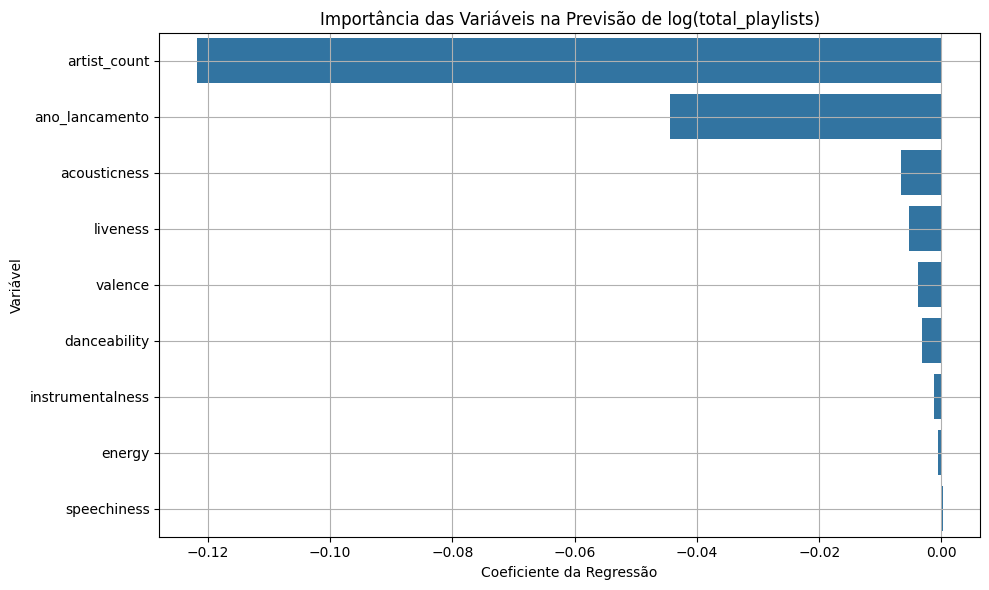

In [ ]:
# Garantindo que a coluna de data está em formato datetime
data['data_lancamento'] = pd.to_datetime(data['data_lancamento'], errors='coerce')
data['ano_lancamento'] = data['data_lancamento'].dt.year

# Selecionando variáveis explicativas
variaveis = [
    'danceability', 'energy', 'valence', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness',
    'artist_count', 'ano_lancamento'
]

# Criando novo DataFrame para o modelo
df_modelo = data[variaveis + ['total_playlists']].dropna()

# Aplicando log na variável dependente (log1p lida com valores zero)
df_modelo['log_total_playlists'] = np.log1p(df_modelo['total_playlists'])

# Separando variáveis preditoras e resposta
X = sm.add_constant(df_modelo[variaveis])  # adiciona intercepto
y = df_modelo['log_total_playlists']

# Ajustando modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Exibindo sumário completo do modelo
print(modelo.summary())

# Visualização dos coeficientes (exceto intercepto)
coef = modelo.params.drop('const').sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=coef.values, y=coef.index)
plt.title('Importância das Variáveis na Previsão de log(total_playlists)')
plt.xlabel('Coeficiente da Regressão')
plt.ylabel('Variável')
plt.grid(True)
plt.tight_layout()
plt.show()


O modelo mostrou que fatores contextuais como **ano de lançamento** e **número de artistas** têm peso importante para explicar o número de playlists de uma música.

Além disso, músicas com menor valor de `acousticness` tendem a estar em mais playlists, o que pode indicar uma preferência editorial por faixas mais produzidas, comerciais ou “menos cruas”.

**Conclusão:**  
A presença em playlists não depende apenas do som da faixa, mas também de **quando** ela foi lançada e **como ela é estruturada artisticamente**. Estratégias de lançamento e posicionamento seguem sendo determinantes para alcançar visibilidade.


##Relação entre Streams x Key

Nesta análise, buscamos entender se a **tonalidade musical** (`key`) tem alguma relação com o número de streams de uma música. A tonalidade é uma característica musical discreta, expressa como uma variável categórica com 12 possíveis valores (C, C#, D, D#, ..., B).

Para verificar se as diferenças nas médias de streams entre essas categorias são significativas, aplicamos um **teste de ANOVA de uma via**, adequado para comparar múltiplos grupos.


Tonalidades disponíveis:
key
C#         119
G           96
Ausente     94
G#          91
F           89
D           81
B           81
A           75
F#          73
E           62
A#          55
D#          33
Name: count, dtype: int64

Média de streams por tonalidade:
key
C#         6.068215e+08
E          5.774972e+08
A#         5.570282e+08
D#         5.530365e+08
D          5.295256e+08
F#         5.223632e+08
B          5.193480e+08
Ausente    5.191694e+08
G#         4.769119e+08
F          4.684464e+08
G          4.525994e+08
A          4.033902e+08
Name: streams, dtype: float64


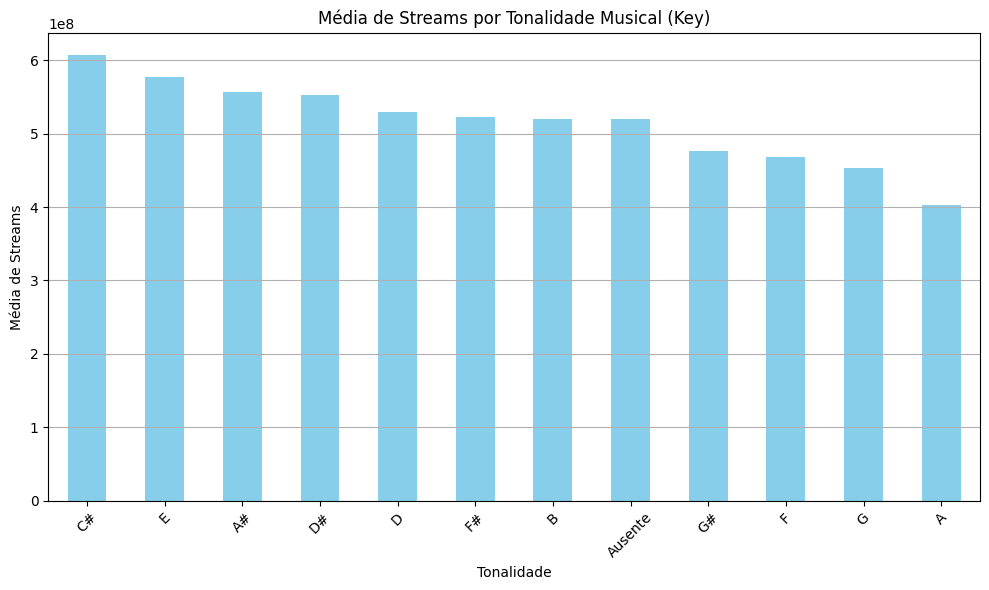

In [ ]:


# Verifica as tonalidades únicas
print("Tonalidades disponíveis:")
print(data['key'].value_counts())

# Calcula a média de streams por tonalidade
media_streams_por_tonalidade = data.groupby('key')['streams'].mean().sort_values(ascending=False)

# Exibe os valores numéricos
print("\nMédia de streams por tonalidade:")
print(media_streams_por_tonalidade)

# Gera o gráfico de barras
plt.figure(figsize=(10, 6))
media_streams_por_tonalidade.plot(kind='bar', color='skyblue')
plt.title('Média de Streams por Tonalidade Musical (Key)')
plt.xlabel('Tonalidade')
plt.ylabel('Média de Streams')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
#  Seleciona as colunas relevantes e remove valores ausentes
df_key_streams = data[['key', 'streams']].dropna()

# Cria uma lista de grupos: cada grupo contém os streams de uma tonalidade
grupos = [grupo['streams'].values for nome, grupo in df_key_streams.groupby('key')]

# Aplica o teste ANOVA
stat, p_valor = f_oneway(*grupos)

# Mostra os resultados
print(f"Estatística F: {stat:.3f}")
print(f"p-valor: {p_valor:.5f}")

# Interpretação básica
if p_valor < 0.05:
    print(" Diferença significativa entre as tonalidades.")
else:
    print(" Nenhuma diferença estatística significativa entre as tonalidades.")


Estatística F: 0.858
p-valor: 0.58203
 Nenhuma diferença estatística significativa entre as tonalidades.


Apesar de algumas tonalidades parecerem ter mais streams do que outras visualmente, o teste estatístico mostra que essas diferenças **não são significativas** do ponto de vista estatístico.

Isso indica que a **tonalidade da música não influencia o número de streams** de forma relevante — pelo menos não de maneira isolada e consistente.

**Conclusão:**  
A hipótese foi refutada. A tonalidade musical (`key`) não tem impacto estatisticamente significativo no sucesso de uma faixa.
